#ЛР_1 Метод kNN своїми руками

На основі даних з датасету [diabets](https://drive.google.com/file/d/1J5tToRZnkQDMfKjw9P1hJsHzz1Hek5xo/view?usp=sharing) необхідно побудувати модель, яка допомогає визначити наявність захворювання у пацієнів за певними ознаками. Для цього будемо використовувати метод *k* найближчих сусідів. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Дослідження даних у цій роботі ми реалізуємо за принципами **OSEMN Pipeline**:


*   O - Obtaining data (Отримання даних)
*   S - Scrubbing / Cleaning  data (Очистка даних)
*   E - Exploring / Visualizing data (Вивчення/Візуалізація даних)
*   M - Modeling data (Моделювання даних)
*   N - Interpreting data (Інтепретація даних)


Виконаємо ці кроки






# O - Obtaining data (Отримання даних)

Завантажимо дані і подивимось на преші 5 рядків фрейму

In [2]:
#Ваш код 
df = pd.read_csv("diabetes.csv")

In [3]:
#Ваш код
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Виконаємо базовий EDA та статистичний аналіз даних 


---


EDA - Exploratory data analysis (пошуковий аналіз даних)

Отримайте інформацію про типи даних, стовпці, кількість нульових значень, використання пам’яті тощо за допомогою методу датафрейму [`.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html?highlight=pandas%20dataframe%20info#pandas.DataFrame.info)

In [4]:
#Ваш код
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Тепер давайте розберемося зі статистикою, яку генерує метод датафрейму [`.describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html?highlight=pandas%20dataframe%20describe#pandas.DataFrame.describe):

*   `count` повідомляє нам кількість NoN-порожніх рядків у ознаки.
*   `mean` повідомляє нам середнє значення цієї ознаки.
*   `std` повідомляє нам значення стандартного відхилення цієї ознаки.
*   `min` повідомляє нам мінімальне значення цієї ознаки.
*  ` 25%, 50% і 75% `– це процентиль/квартиль кожної ознаки. Ця квартильна інформація допомагає нам виявити викиди.
*   `max` повідомляє нам максимальне значення цієї ознаки.





In [5]:
#Ваш код
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Для комфортного сприйняття інформації, розвернемо цей звіт: `ваш_датафрейм.describe().T`

In [6]:
#Ваш код
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# S - Scrubbing / Cleaning data (Очистка даних)

А тепер поміркуємо над сенсом даних: подивіться на стовпчик `min`: серед ознак чимало даних з нульвим мінімальним значенням. Нам потрібно зрозуміти, *чи може мінімальне значення деяких ознак дорівнювати нулю?*

*   ознака Pregnancies - вочевидь, кількість вагітностей пацієнта може дорівнювати 0
*   ознака Glucose - рівень глюкози у крові НЕ може бути нульовим
*   ознака BloodPressure - кровяний тиск пацієнтів також НЕ може бути на нулі
*   ознака SkinThickness - товщина шкіри НЕ може бути нульовою
*   ознака Insulin - рівень інсуліну НЕ може бути нульовим
*   ознака BMI - індекс маси тіла (зріст/вага) НЕ може бути нульовим
*   ознака Outcome - це цільова ознака, тобто бінарна відповідь на об'єкті, нульове значення якої свідчить про відсутність хвороби, а одиниця - про наявність


Отже, ознаки **Glucose, BloodPressure, SkinThickness, Insulin** та **BMI** не можуть приймати нульове значення. А наявність нулів свідчить про пропущені значення

Краще замінити нулі на `nan`, оскільки після цього їх буде легше рахувати і розуміти дані. Для цього скористайтесь методом датафрейму [`.replace(0,np.NaN)`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html?highlight=pandas%20dataframe%20replace#pandas.DataFrame.replace) для тих ознак, які не можуть бути нульовими. Виведіть кількість відсутніх значень за допомогою методу датафрейму [`.sum()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html?highlight=pandas%20dataframe%20sum#pandas.DataFrame.sum)

In [7]:
#Ваш код
df["Glucose"] = df["Glucose"].replace(0, np.NaN)
df["BloodPressure"] = df["BloodPressure"].replace(0, np.NaN)
df["SkinThickness"] = df["SkinThickness"].replace(0, np.NaN)
df["Insulin"] = df["Insulin"].replace(0, np.NaN)
df["BMI"] = df["BMI"].replace(0, np.NaN)


#Ваш код
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Тепер бачимо, що деякі ознаки мають достатньо велику кількість пропущених значень. Маємо з цим щось робити. Перше, що спадає на думку, видалити об'єкти з відсутніми значеннями. І, так, це один з варіантів вирішення проблеми. Він є безболісним у випадку великих датастів, коли втрата кількох сотен об'єктів не відіграє значної ролі для моделі. Давайте оцінимо, чи можимо ми застосувати таку жорстокість до нашого датафрейму - вивідемо його ромір

In [8]:
#Ваш код
df.shape

(768, 9)

Бачимо, що видалення відсутніх значень призведе до втрати майже 50% даних. То такий варіант не підходить.

Взагалі-то, процедура відновлення даних називається **ІМПУТАЦІЯ**, і один з варіантів імпутації ви вже знаєте - інтерполяція. Є ще один підхід - замінити пропущені значення однією з мір центральної тенденції (середнє, медіана, мода). Так і вчинемо з нашим датасетом: знайдемо міру центральної тенеденції кожної з п'яти ознак (**Glucose**, **BloodPressure**, **SkinThickness**, **Insulin**, **BMI**) і замінемо цими значеннями пропущені дані у відповідних ознаках. 

Але спочатку потрібно визначитись, на яку з мір центральної тенденції будемо робити заміну і для яких ознак. Для того, щоб відповісти на це питання, потрібно подивитись на розподіл ознак. Виведіть діаграми розподілу (гістограми) ознак, скориставшись методом датафрейму [`.hist()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html?highlight=pandas%20dataframe%20hist#pandas.DataFrame.hist). Параметром цього методу можна задати розмір гісторам, наприклад, `figsize = (10,10)`

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

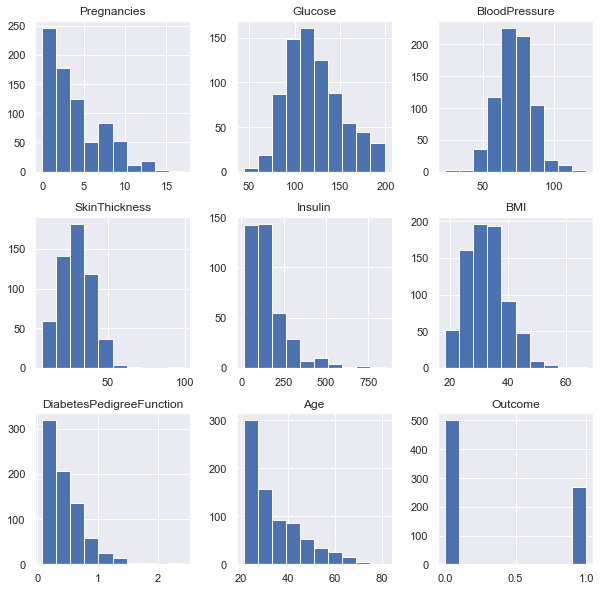

In [9]:
#Ваш код
df.hist(figsize=(10, 10))

Одразу шукаємо ознаки з симетричним нормальним розподілом - це ознаки **Glucose, BloodPressure** і **BMI**. Для них у якості заміни пропущених значень застосуємо середнє значення - метод датафрейму [`.mean()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html?highlight=pandas%20dataframe%20mean#pandas.DataFrame.mean).  Для решти ознак - **SkinThickness** і **Insulin**, які мають правосторонній перекос, доречно застосувати медіану - метод датафрейму [`.median()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.median.html?highlight=pandas%20dataframe%20median#pandas.DataFrame.median). 

Для реалізації заміни скористуємось методом датафрейму  [`.fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html). Важливо: обов'язково застосовуйте параметр `inplace = True` для того, щоб заміни не створювались у додаткових стовпцях, а підмінили собою існуючі!

In [10]:
#Ваш код
df["Glucose"].fillna(df["Glucose"].mean(), inplace=True)
df["BloodPressure"].fillna(df["BloodPressure"].mean(), inplace=True)
df["SkinThickness"].fillna(df["SkinThickness"].mean(), inplace=True)

df["Insulin"].fillna(df["Insulin"].median(), inplace=True)
df["BMI"].fillna(df["BMI"].median(), inplace=True)


# E - Exploring / Visualizing data (Вивчення/Візуалізація даних)

На цьому етапі потрібно отримати повне уявлення про дані, з якими ми працюємо. Перш за все, необхідно вивчити цільову ознаку, тобто відповіді на об'єктах. Вони знаходяться у стовпці **Outcome**. Раніше вже йшлося про те, що відповіді бінарні, і приймають значення 0 або 1. Розв'язувана задача належить до класу бінарної класифікації, а значення 0 і 1 є мітками класів "*захворювання не виявлене*" і "*захворювання виявлене*" відповідно.  

Для побудови адекватної класифікаційної моделі важливо знати баланс класів, тому що від цьго залежить вибір метрики якості моделі. Подивимось на співвідношення об'єктів обох класів. Виведіть стовпчату діаграму (`kind = bar`), де кожен бар - то кількість об'єктів відповідного класу. Кількість об'єктів у стовпці датафрейму можна визначити за допомогою методу [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html?highlight=pandas%20dataframe%20value_counts#pandas.DataFrame.value_counts)

<AxesSubplot:>

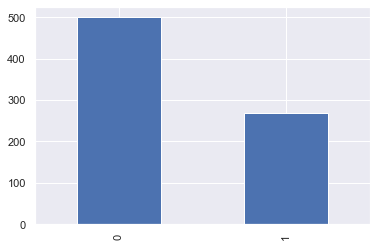

In [11]:
#Ваш код
df["Outcome"].value_counts().plot(kind="bar")

На графіку видно, що здорових людей вдвічі більше за хворих на цукровий діабет. Тобто вибірка незбалансована.

Тепер необхідно проаналізувати чи не корелюють ознаки між собою. Коефіцієнт кореляції Пірсона допомагає з’ясувати зв’язок між двома величинами. Значення коефіцієнта кореляції Пірсона може бути від -1 до +1. 1 означає, що вони сильно корельовані, а 0 означає відсутність кореляції. Можна вивести матрицю кореляцій Пірсона методом [`.corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html?highlight=pandas%20dataframe%20corr#pandas.DataFrame.corr)

In [12]:
#Ваш код
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.154678,0.542438,0.100966,0.127872,0.215299
Insulin,0.025047,0.419064,0.045087,0.154678,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.542438,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.203790,0.312038,0.173844,0.238356,1.000000


Але матриця кореляції не дуже наочна, особливо, коли ознак багато. Візуалізація краще виглядає на тепловій карті. Теплова карта – це двовимірне представлення інформації за допомогою кольорів. Теплові карти можуть допомогти користувачеві візуалізувати просту чи складну інформацію. Скористайтеся методом бібліотеки **seaborn** [`heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html), параметром якого буде кореляційна матриця з попереднього завдання, а також використайте наступні параметри: `annot = True`, `cmap = 'RdYlGn'`

<AxesSubplot:>

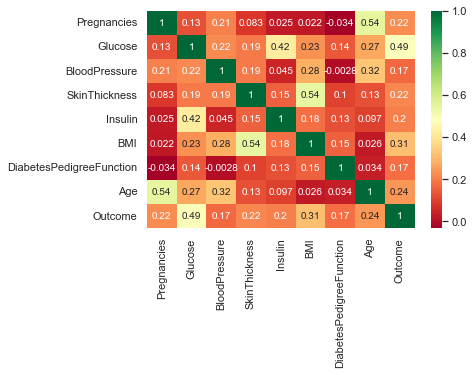

In [13]:
#Ваш код
sns.heatmap(data=df.corr(), annot=True, cmap="RdYlGn")

Бачимо, що ознаки між собою не корелюють

**Наступним кроком є масштабування даних**

Навіщо масштабувати дані для kNN?
Завжди доцільно привести всі ознаки в один масштаб для застосування алгоритмів на основі відстані, таких як kNN.
Давайте розглянемо приклад обчислення відстані з використанням двох ознак, величини/діапазони яких сильно відрізняються.
Евклідова відстань = [(100000–80000)^2 + (30–25)^2]^(1/2)

Ми бачимо, як ознака з більшим діапазоном затьмарює або повністю зменшує меншу ознаку, і це вплине на продуктивність усіх моделей на основі відстані, оскільки вона надасть більшу вагу змінним, які мають більшу величину.

Для масштабування даних, скористаємось методом [`StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) бібліотеки `sklearn.preprocessing`. Для того, щоб нормалізувати дані і одразу їх трансформувати у масив, використаємо метод `fit_transform()`. А також видалимо цільову ознаку **Outcome**, оскільки її масштабувати не потрібно і сформуємо матрицю ознак *Х* і вектор відповідей *у*.

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X =  pd.DataFrame(scaler.fit_transform(df.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

Виведіть перші 5 рядків відмасштабованих даних

In [15]:
#Ваш код
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,0.316566,1.549303,5.484909,-0.020496


Створіть вектор відповідей *y* з ознаки **Outcome**

In [16]:
y = df["Outcome"].values

# M - Modeling data (Моделювання даних)

Реалізуйте самостійно метод kNN з евклідовою метрикою для класифікаційної задачі.  

 

З початку необхідно розділити дані на навчальну та тестову вибірку

In [17]:
#Ваш код
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Ваша реалізація може бути влаштована наступним чином: для кожного об'єкта з навчальної вибірки складається список пар [відстань між цим об'єктом і кожним наступним об'єктом у вибірці, мітка цього об'єкту]. 




Розглянемо простий приклад. У нас є 5 об'єктів з відповідями на них:

In [18]:
#0 [1, 0] [0]
#1 [3, 2] [1]
#2 [0, 0] [0]
#3 [3, 3] [1]
#4 [2, 3] [1]

Для кожного з них розрахуємо відстань до решти об'єктів і запишемо у список пари [відстань, відповідь]. Відстань будемо виміряти за Евклидовою метрикою (мірою):





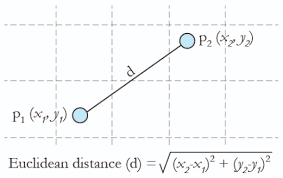


Розрахунок відстаней від нульового об'єкту до решти об'єктів:  

In [19]:
d0_1 = np.sqrt((1-3)**2+(0-2)**2)
d0_2 = np.sqrt((1-0)**2+(0-0)**2)
d0_3 = np.sqrt((1-3)**2+(0-3)**2)
d0_4 = np.sqrt((1-2)**2+(0-3)**2)
print(d0_1, d0_2, d0_3, d0_4)

2.8284271247461903 1.0 3.605551275463989 3.1622776601683795


Отже, список пар [відстань, відповідь] до нульового обєкта виглядає як


In [20]:
# [[2.8, 1], 
#  [1.0, 0], 
#  [3.6, 1],
#  [3.2, 1]] 

Наступним етапом буде сортування цього списку за значенням відстані за зростанням, тобто ми хочемо щоб самі близькі до нульового об'єкти були на початку сортованого списку:

In [21]:
#  [[1.0, 0], 
#   [2.8, 1],  
#   [3.2, 1], 
#   [3.6, 1]]

Зробимо прогноз класу нульового об'єкту по одному найближчому сусіду (***k*** = 1). Найближчий сусід знаходиться на відстані, рівній 1.0 і має мітку класу 0, тому прогнозуємо, що нульовий об'єкт також належить до 0-го класу. Ми знаємо істинну відповідь на нульовому об'єкті: він, дійсно належить до 0-го класу, тож наш прогноз справдився на 100%. 

Аналогічним чином вчиняємо з першим об'єктом, звісно, виключаючи його зі списку об'єктів, до яких розраховується відстань.

In [22]:
d1_0 = np.sqrt((3-1)**2+(2-0)**2)
d1_2 = np.sqrt((3-0)**2+(2-0)**2)
d1_3 = np.sqrt((3-3)**2+(2-3)**2)
d1_4 = np.sqrt((3-2)**2+(2-3)**2)
print(d1_0, d1_2, d1_3, d1_4)

2.8284271247461903 3.605551275463989 1.0 1.4142135623730951


Отже, список пар [відстань, відповідь] до першого обєкта виглядає як

In [23]:
# [[2.8, 0], 
#  [3.6, 0], 
#  [1.0, 1],
#  [1.4, 1]] 

#  # Відсортований список

#  [[1.0, 1],
#   [1.4, 1],
#   [2.8, 0], 
#   [3.6, 0]]

Найближчий сусід має мітку класу 1, тому робимо прогноз, що перший об'єкт також належить до 1-го класу. Ми знаємо істинну відповідь на першому об'єкті - він, дійсно належить до 1-го класу, тож наш прогноз знову справдився на 100%.

 І так для усіх об'єктів з вибірки ми будемо прогнозувати їх клас за одним сусідом і вимірювати якість прогнозу. Для більшого датасету потрібно повторити процедуру для двох, трьох, чотирьох... і т.д. сусідів, кожного разу вимірюючи якість алгоритму для певної кількості сусідів. Підбір кількості сусідів і є *процедурою навчання алгоритму kNN*. Якість для задачі класифікації будемо визначати метрикою **accuracy**. Коли ми визначемо якість алгоритму для усього діпазону сусідів, від 1 до, приміром 30, необхідно визначити скільки ж сусідів забезпечили найвищу якість алгоритму. А потім перевірити цей алгоритм на тестовій вибірці.    

Якщо прогноз виконується за одним сусідом, *k* = 1, то прогнозований об'єкт набуває класу сусіда. А якщо *k* = 2, 3, 4,..., то на якого сусіда орієнтуватись? Якщо  *k* > 1, то вибираємо найпопулярніший клас серед сусідів. Наприклад, ви реалізуєте kNN для *k* = 4. Підраховуємо скільки сусідів належить до кожного класу і обираємо той клас, представників якого більше. Але може бути така ситуація, коли при парному *k* кількість представників усіх класів однакова. Можна заморочитись і проаналізувати котрі сусіди з *k* знаходяться ближче, можна у таких випадках завжди відносити до найпопулярнішого класу в усій вибірці, а самим правільним рішенням буде застосовувати зважений kNN. Але, у цій роботі немає вимог використовувати зважений kNN.

1.   Реалізуйте ідею пошуку оптимальної кількості сусідів для даних з датасету **diabets** для кількості сусідів ***k*** з діапазону від 1 до 15.
2.   Для кожного ***k*** записуйте якість алгоритму у список.  
3.   Розрахуйте якість алгоритму для кожного ***k*** на тестовій вибірці.
4.   Побудуйте графіки залежності якості алгоритму від кількості сусідів ***k***.
5.   Оберіть оптиальне ***k***, проаналізувавши графіки.




In [24]:
#Ваш код TODO
from matplotlib.pyplot import axis
import scipy.stats
from sklearn.metrics import mean_squared_error

class MyFinder:
    k = 1
    x = np.array([])
    y = np.array([])
    
    def __init__(self, k):
        self.k = k

    def fit(self, x, y):
        self.x = x
        self.y = y

    
    def __calc(self, item):
        distances = np.linalg.norm(self.x - item, axis=1)
        #if the item was in fit, then the first item in
        # the array will be the item itself,
        # be carefull with calculations on the fitted data 
        nearest_neighbor_ids = distances.argsort()[:self.k]
        nearest_neighbor_answers = self.y[nearest_neighbor_ids]
        return scipy.stats.mode(nearest_neighbor_answers).mode[0]


    def predict(self, x):
        calc_anserws = []
        for index, row in x.iterrows():
            calc_anserws.append(self.__calc(row))
        return np.array(calc_anserws)



train = []
test = []

def get_best(answers):
    best_index = answers.index(min(answers))
    print(f"The best RSS={answers[best_index]}, k={best_index+1}")

#we use test data for main score, test data will not work for this 
#because of the __calc method comments
for k in range(1, 15):
    model =  MyFinder(k=k)
    model.fit(X_train, y_train)
    rss_train = mean_squared_error(y_train, model.predict(X_train))
    rss_test = mean_squared_error(y_test, model.predict(X_test))
    train.append(rss_train)
    test.append(rss_test)
    print(f"RSS (k={k}): {rss_test}")


get_best(test)

RSS (k=1): 0.3489583333333333
RSS (k=2): 0.3229166666666667
RSS (k=3): 0.2916666666666667
RSS (k=4): 0.2916666666666667
RSS (k=5): 0.2552083333333333
RSS (k=6): 0.28125
RSS (k=7): 0.2760416666666667
RSS (k=8): 0.23958333333333334
RSS (k=9): 0.265625
RSS (k=10): 0.24479166666666666
RSS (k=11): 0.2604166666666667
RSS (k=12): 0.24479166666666666
RSS (k=13): 0.234375
RSS (k=14): 0.24479166666666666
The best RSS=0.234375, k=13


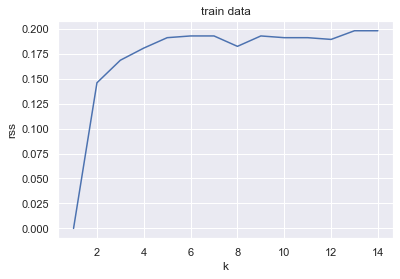

In [25]:
plt.title("train data")
plt.xlabel("k")
plt.ylabel("rss")
plt.plot(range(1, 15), train)


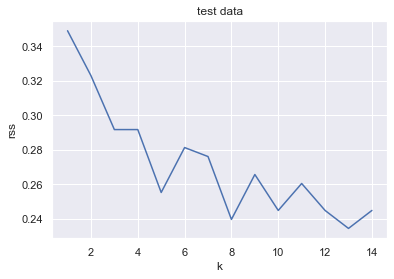

In [26]:
plt.title("test data")
plt.xlabel("k")
plt.ylabel("rss")
plt.plot(range(1, 15), test)

Тепер реалізуйте кроки 1-5 за допомогою класифікатора [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) з модуля `sklearn.neighbors`

In [27]:
#Ваш код
from sklearn.neighbors import KNeighborsClassifier

train = []
test = []

for k in range(1, 15):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    rss_train = mean_squared_error(y_train, model.predict(X_train))
    rss_test = mean_squared_error(y_test, model.predict(X_test))
    train.append(rss_train)
    test.append(rss_test)
    print(f"RSS (k={k}): {rss_test}")
    
get_best(test)

RSS (k=1): 0.3489583333333333
RSS (k=2): 0.3229166666666667
RSS (k=3): 0.2916666666666667
RSS (k=4): 0.2916666666666667
RSS (k=5): 0.2552083333333333
RSS (k=6): 0.28125
RSS (k=7): 0.2760416666666667
RSS (k=8): 0.23958333333333334
RSS (k=9): 0.265625
RSS (k=10): 0.24479166666666666
RSS (k=11): 0.2604166666666667
RSS (k=12): 0.24479166666666666
RSS (k=13): 0.234375
RSS (k=14): 0.24479166666666666
The best RSS=0.234375, k=13


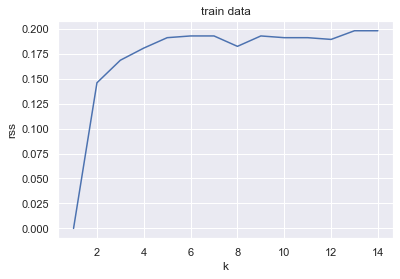

In [28]:
plt.title("train data")
plt.xlabel("k")
plt.ylabel("rss")
plt.plot(range(1, 15), train)

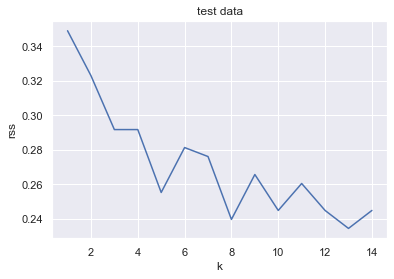

In [29]:
plt.title("test data")
plt.xlabel("k")
plt.ylabel("rss")
plt.plot(range(1, 15), test)

# N - Interpreting data (Інтепретація даних)

На етапі Exploring / Visualizing data ми з'ясували, що вибірка незбалансована: кількість об'єктів одного класу сильно перебільшує кількість об'єктів іншого класу. Отже, метрика `accuracy` не дає об'єктивного розуміння про якість моделі. Побудуйте confusion-матрицю, щоб мати уявлення про співвідношення об'єктів у True Positive, True Negative, False Positive та False Negative. Використовуйте інструмент [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix) з модуля `sklearn.metrics`

In [30]:
#Ваш код
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

best_k = 5
best_model = KNeighborsClassifier(best_k)
best_model.fit(X_train, y_train)
y_true = y_test
y_predict = best_model.predict(X_test)
confusion_matrix(y_true, y_predict)

array([[103,  22],
       [ 27,  40]], dtype=int64)

Виведіть звіт по основних метриках класифікаційної задачі за допомогою інструмента [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html?highlight=classification_report#sklearn.metrics.classification_report)

In [31]:
#Ваш код

from sklearn.metrics import classification_report


print(classification_report(y_true, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       125
           1       0.65      0.60      0.62        67

    accuracy                           0.74       192
   macro avg       0.72      0.71      0.71       192
weighted avg       0.74      0.74      0.74       192



Зробіть висновки по якості отриманої моделі на основі отриманого звіту. Яка метрика дає повну інформацію?

Для того, щоб розуміти наскільки добре наша модель зправляється з завданням виявляти хворобу, візуалізуйте ROC - криву ([`roc_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html?highlight=roc_curve#sklearn.metrics.roc_curve)) і пригадайте якою має бути крива ідеального алгоритму, а якою - найгіршого.

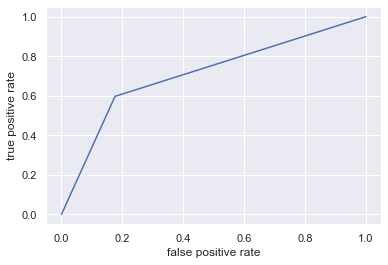

In [32]:
#Ваш код
from sklearn.metrics import roc_curve


fpr, tpr, _ = roc_curve(y_true, y_predict)


plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
#the better true positive rate the better
plt.plot(fpr, tpr)

І, на останок, я покажу вам дуже вправний інструмент, який застосовується абсолютно до всіх методів, які мають гіперпараметри (у kNN гіперпараметр - то кількість сусідів). Знаходження оптимального значення певних параметрів припускає запуск багатьох вкладених циклів - чим більше параметрів, тим глибша вкладеність. Наприклад, у градієнтному бустінгу 2 основні гіперпараметри: розмір кроку і кількість базових алгоритмів. Необхідно віднайти оптимальне співвідношення цих параметрів (насправді, гіпермараметрів ГБ набагато більше, це лише явні, так би мовити макро гіперпараметри).

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors':np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv = 5)
knn_cv.fit(X, y) #X - масштабована вибірка ознак, у - вектор відповідей

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7734827264239028
Best Parameters: {'n_neighbors': 25}
